<a href="https://colab.research.google.com/github/skytecat/FraudDetection/blob/main/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЧТО СДЕЛАТЬ/ПРОВЕРИТЬ:

- сохранить модель с предобработкой
- написать вывод
- написать инструкцию по запуску
- проверить на опечатки

## Загрузка и анализ данных

### Импорт библиотек

In [1]:
# Базовые библиотеки для работы с данными
import pandas as pd
import numpy as np

# Визуализация данных
import seaborn as sns
import matplotlib.pyplot as plt

# Предобработка данных
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Модели машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Оценка модели и подбор гиперпараметров
from sklearn.model_selection import (
     cross_val_score,
     GridSearchCV,
     cross_val_predict,
     StratifiedKFold
)
from sklearn.metrics import (
    precision_recall_curve,
    auc,
    make_scorer,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

# Методы балансировки данных
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

### Загрузка данных

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Анализ структуры данных

In [ ]:
data.shape

(284807, 31)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Датасет содержит **284,807 записей** и **31 признак**, включая целевую переменную (`Class`). Вот основные наблюдения:


**Типы данных:**
- Все признаки, кроме `Class`, имеют тип `float64`.
- Целевая переменная `Class` имеет тип `int64` (0 — легальная транзакция, 1 — мошенническая).

**Отсутствие пропусков:**
- Во всех столбцах указано **284,807 непустых значений**, что соответствует общему количеству записей. Это означает, что в данных **нет пропущенных значений**.


### Анализ распределений числовых признаков

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data['Amount'].describe()

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


Text(0.5, 0, 'Amount')

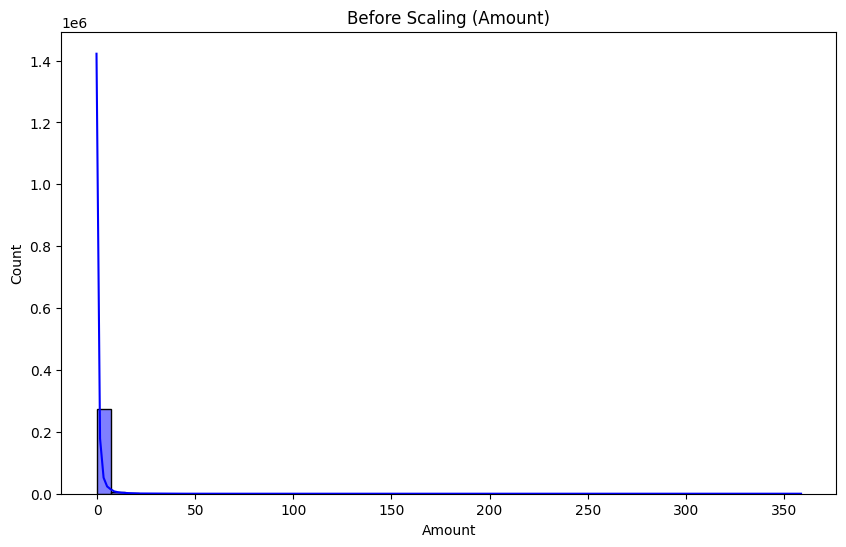

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], kde=True, bins=50, color='blue')
plt.title('Before Scaling (Amount)')
plt.xlabel('Amount')

При анализе распределения признака `Amount` (сумма транзакции) были выявлены следующие особенности:
- **Большой разброс значений:** Минимальное значение — 0, максимальное — 25691.16.
- **Наличие выбросов:** Стандартное отклонение (250.12) значительно превышает среднее значение (88.35), что указывает на наличие экстремальных значений.

**Принято решение использовать `RobustScaler`:**
- Этот метод использует медиану и межквартильный размах (IQR), что делает его устойчивым к выбросам..
- Он сохраняет линейную шкалу данных, что важно для интерпретации результатов.

Признаки **V1, V2, ..., V28** представляют собой главные компоненты, полученные с помощью метода **PCA (Principal Component Analysis)**.

PCA автоматически стандартизирует данные перед вычислением главных компонентов.

Таким образом, масштабирование данных после PCA является избыточным.
Поэтому было принято решение **не применять дополнительное масштабирование** к признакам **V1, V2, ..., V28**.

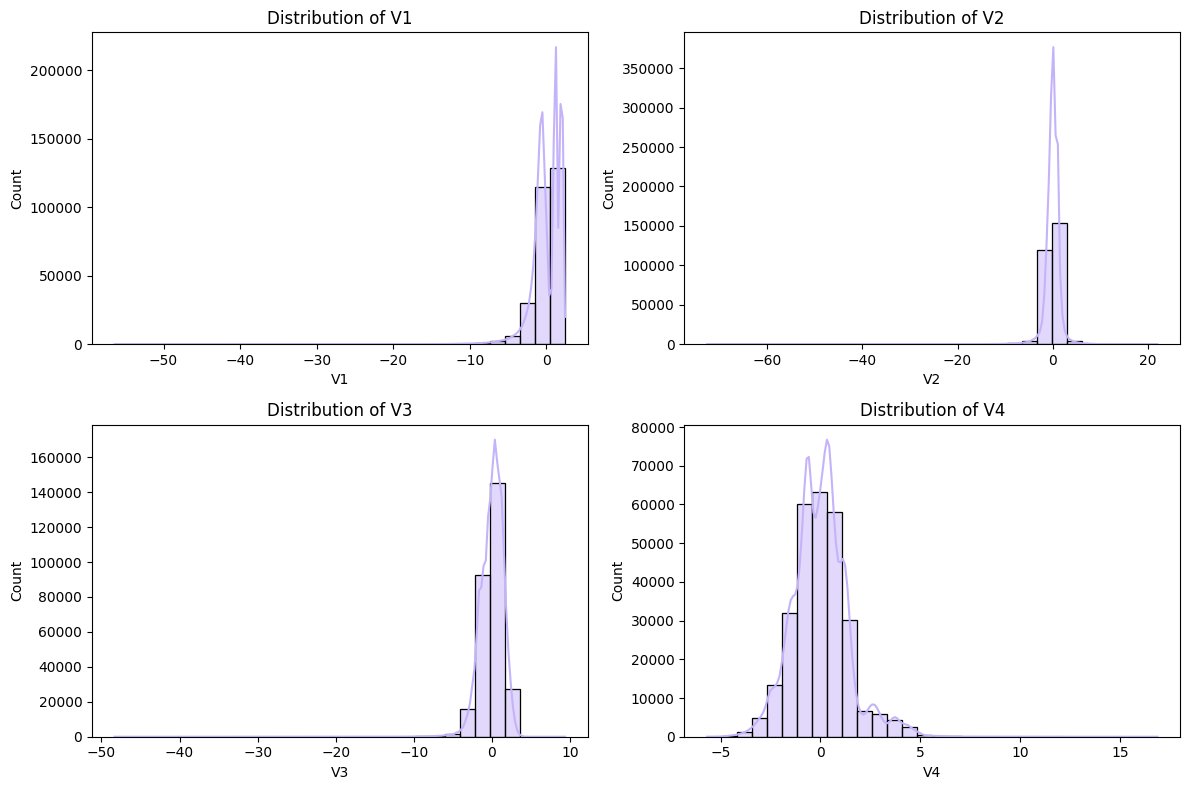

In [27]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['V1', 'V2', 'V3', 'V4'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True, bins=30, color='#C5B3F9')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

### Обнаружение дубликатов

In [ ]:
data.duplicated().sum()

np.int64(1081)

In [ ]:
data[data['Class']==1].duplicated().sum()

np.int64(19)

### Распределение целевого признака (дисбаланс классов)

In [32]:
class_distribution = pd.Series(data["Class"]).value_counts(normalize=True) * 100
class_distribution = class_distribution.apply(lambda x: f"{x:.3f}%")

class_distribution

,proportion
Class,
0,99.833%
1,0.167%


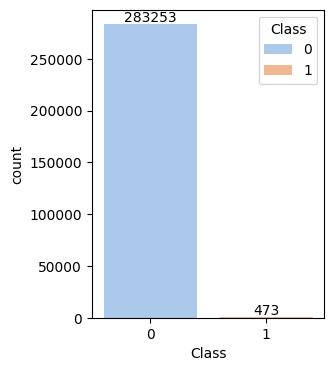

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=data,palette="pastel", hue='Class')
for i in ax.containers:
    ax.bar_label(i,)

В данной задаче наблюдается значительный дисбаланс классов. Доля миноритарного класса (например, мошеннические транзакции) составляет всего **0.172%**. Такая несбалансированность создает сложности при обучении моделей машинного обучения:

- Модели могут быть склонны к предсказанию мажоритарного класса, игнорируя миноритарный.
- Обычные метрики, такие как **Accuracy**, становятся ненадежными, так как высокая точность может быть достигнута простым предсказанием мажоритарного класса.

Чтобы справиться с этой проблемой, я буду использовать специализированные методы балансировки данных (Random Undersampling, SMOTE, Random Oversampling) и выберу метрики, которые будут адекватно отражать качество модели в условиях дисбаланса.

### Выбор метрик оценки качества модели

Для задач с дисбалансом классов стандартные метрики, такие как **Accuracy**, неинформативны. Я буду использовать следующие метрики, которые лучше подходят для оценки производительности модели:

1. **Precision:**
   - Доля правильно предсказанных положительных классов среди всех предсказанных как положительные.
   - Важна для минимизации ложных срабатываний (False Positives).

2. **Recall:**
   - Доля правильно предсказанных положительных классов среди всех реальных положительных классов.
   - Важна для минимизации пропущенных случаев (False Negatives).

3. **F1-Score:**
   - Гармоническое среднее между Precision и Recall.
   - Используется для поиска баланса между Precision и Recall.

4. **AUPRC (Area Under the Precision-Recall Curve):**
   - Площадь под кривой Precision-Recall.
   - Особенно полезна для задач с дисбалансом классов, так как фокусируется на миноритарном классе.

**AUPRC** будет использоваться как основная метрика для сравнения моделей, так как она наиболее информативна для задач с дисбалансом классов.

## Предобработка данных

### Удаление дубликатов

In [12]:
data.drop_duplicates(inplace=True)
data.shape

(283726, 31)

### Удаление признака "Time"

In [13]:
data = data.drop('Time', axis=1)

### Масштабирование числовых признаков

In [14]:
# Применение RobustScaler к признаку Amount
scaler = RobustScaler()
data['Amount_scaled'] = scaler.fit_transform(data[['Amount']])

# Проверка результата
print("Статистика после масштабирования:")
print(data[['Amount', 'Amount_scaled']].describe())

Статистика после масштабирования:
              Amount  Amount_scaled
count  283726.000000  283726.000000
mean        0.928844       0.924387
std         3.498909       3.482123
min        -0.307413      -0.305938
25%        -0.229162      -0.228063
50%         0.000000       0.000000
75%         0.775658       0.771937
max       358.683155     356.962314


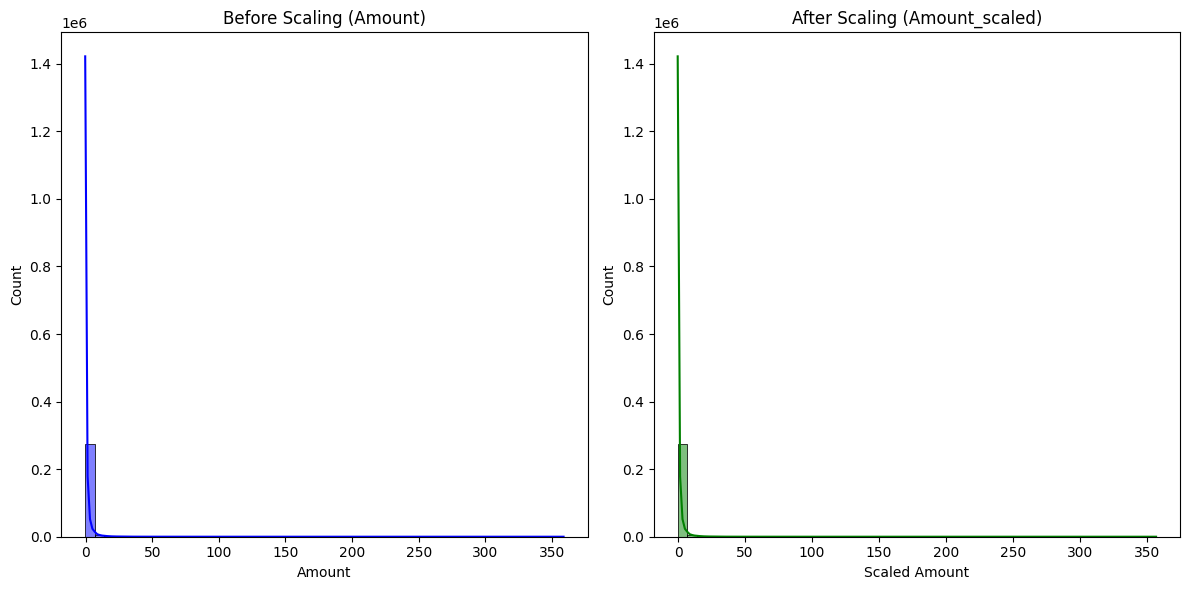

In [15]:
# Визуализация распределения до масштабирования
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Amount'], kde=True, bins=50, color='blue')
plt.title('Before Scaling (Amount)')
plt.xlabel('Amount')

# Визуализация распределения после масштабирования
plt.subplot(1, 2, 2)
sns.histplot(data['Amount_scaled'], kde=True, bins=50, color='green')
plt.title('After Scaling (Amount_scaled)')
plt.xlabel('Scaled Amount')

plt.tight_layout()
plt.show()

In [33]:
data['Amount'] = data['Amount_scaled']
data = data.drop('Amount_scaled', axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.774718,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.268530,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.959811,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.411487,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.667362,0


### Разделение данных на выборки

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Dummy model
Модель, которая всегда будет предсказывать класс "мошенничество". Она будет служить отправной точкой для сравнения с более сложными моделями.

In [ ]:
y_pred_dummy = [1] * len(y_test)  # Предсказания только "мошенничество"

# Оценка качества
precision, recall, _ = precision_recall_curve(y_test, y_pred_dummy)

auprc_dummy = auc(recall, precision)
f1_dummy = f1_score(y_test, y_pred_dummy)
recall_dummy = recall_score(y_test, y_pred_dummy)
prec_dummy = precision_score(y_test, y_pred_dummy)

In [ ]:
ndf = [(recall_dummy, prec_dummy, f1_dummy, auprc_dummy)]

dummy_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'AUPRC'])
dummy_score.insert(0, 'Model', 'Dummy model')
dummy_score.round(3)

,Model,Recall,Precision,F1 Score,AUPRC
0,Dummy model,1.0,0.001674,0.003343,0.500837


## Обучение моделей на исходных данных

### Logistic Regression

#### Обучение модели

In [ ]:
imbalanced_log = LogisticRegression(max_iter=1000, random_state=42)

imbalanced_log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Оценка модели

In [ ]:
y_probs = imbalanced_log.predict_proba(X_test)[:, 1]
precision1, recall1, _ = precision_recall_curve(y_test, y_probs)
auprc_imbalanced_log = auc(recall1, precision1)

In [ ]:
test_pred = imbalanced_log.predict(X_test)
f1_imbalanced_log = f1_score(y_test, test_pred)
prec_imbalanced_log = precision_score(y_test, test_pred)
recall_imbalanced_log = recall_score(y_test, test_pred)

In [ ]:
ndf = [(recall_imbalanced_log, prec_imbalanced_log, f1_imbalanced_log, auprc_imbalanced_log)]

imbalanced_log_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'AUPRC'])
imbalanced_log_score.insert(0, 'Model', 'Imbalanced Data Logistic Regression')
imbalanced_log_score.round(3)

,Model,Recall,Precision,F1 Score,AUPRC
0,Imbalanced Data Logistic Regression,0.579,0.846,0.688,0.69


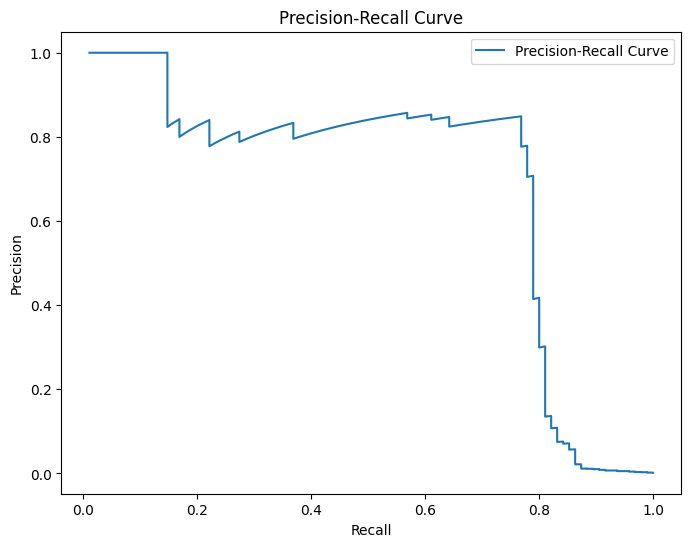

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall1[:-1], precision1[:-1], label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

### Random Forest

#### Обучение модели

In [ ]:
imb_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

imb_rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

#### Оценка модели

In [ ]:
test_pred = imb_rf_model.predict(X_test)
f1_imbalanced_f = f1_score(y_test, test_pred)
prec_imbalanced_f = precision_score(y_test, test_pred)
recall_imbalanced_f = recall_score(y_test, test_pred)

In [ ]:
y_pred_proba = imb_rf_model.predict_proba(X_test)[:, 1]
precision2, recall2, _ = precision_recall_curve(y_test, y_pred_proba)
auprc_imbalanced_f = auc(recall2, precision2)

In [ ]:
ndf = [(recall_imbalanced_f, prec_imbalanced_f, f1_imbalanced_f, auprc_imbalanced_f)]

imbalanced_f_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'AUPRC'])
imbalanced_f_score.insert(0, 'Model', 'Imbalanced Data Random Forest')
imbalanced_f_score.round(3)

,Model,Recall,Precision,F1 Score,AUPRC
0,Imbalanced Data Random Forest,0.705,0.985,0.822,0.818


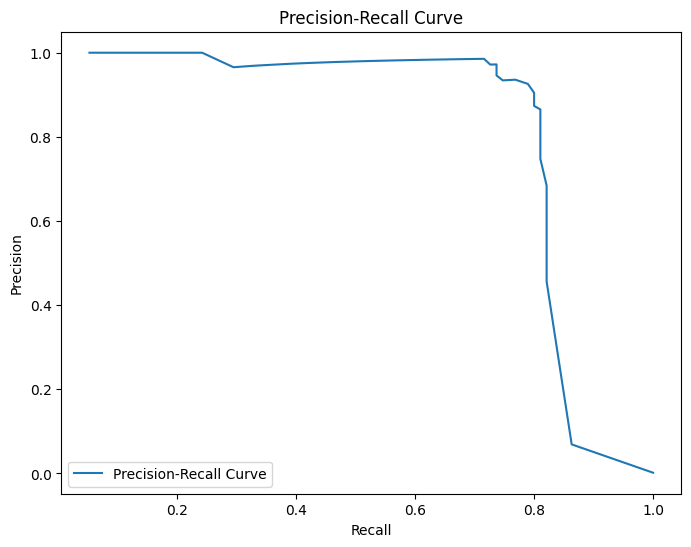

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall2[:-1], precision2[:-1], label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

## Обучение моделей на сбалансированных данных

### Random Oversampling


#### Балансировка данных

In [ ]:
ros = RandomOverSampler(random_state=42)

X_over, y_over = ros.fit_resample(X_train, y_train)

In [ ]:
print('Genuine:', y_over.value_counts()[0], '/', round(y_over.value_counts()[0]/len(y_over) * 100,2), '% of the dataset')
print('Frauds:', y_over.value_counts()[1], '/',round(y_over.value_counts()[1]/len(y_over) * 100,2), '% of the dataset')

Genuine: 226602 / 50.0 % of the dataset
Frauds: 226602 / 50.0 % of the dataset


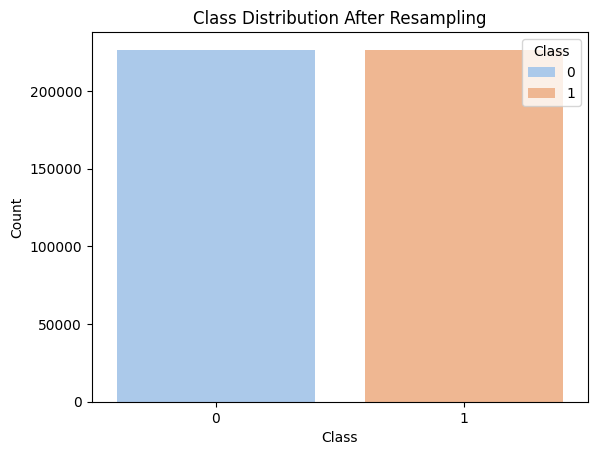

In [ ]:
sns.countplot(x=y_over, palette='pastel', hue=y_over)
plt.title("Class Distribution After Resampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#### Logistic Regression

##### Обучение модели

In [ ]:
randover_log = LogisticRegression(max_iter=1000, random_state=42)

randover_log.fit(X_over, y_over)

LogisticRegression(max_iter=1000)

##### Оценка модели

In [ ]:
y_probs = randover_log.predict_proba(X_test)[:, 1]
precision3, recall3, _ = precision_recall_curve(y_test, y_probs)
auprc_randover_log = auc(recall3, precision3)

In [ ]:
test_pred = randover_log.predict(X_test)
f1_randover_log = f1_score(y_test, test_pred)
prec_randover_log = precision_score(y_test, test_pred)
recall_randover_log = recall_score(y_test, test_pred)

In [ ]:
ndf = [(recall_randover_log, prec_randover_log, f1_randover_log, auprc_randover_log)]

randover_log_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'AUPRC'])
randover_log_score.insert(0, 'Model', 'Random Oversampling Logistic Regression')
randover_log_score.round(3)

,Model,Recall,Precision,F1 Score,AUPRC
0,Random Oversampling Logistic Regression,0.874,0.056,0.106,0.705


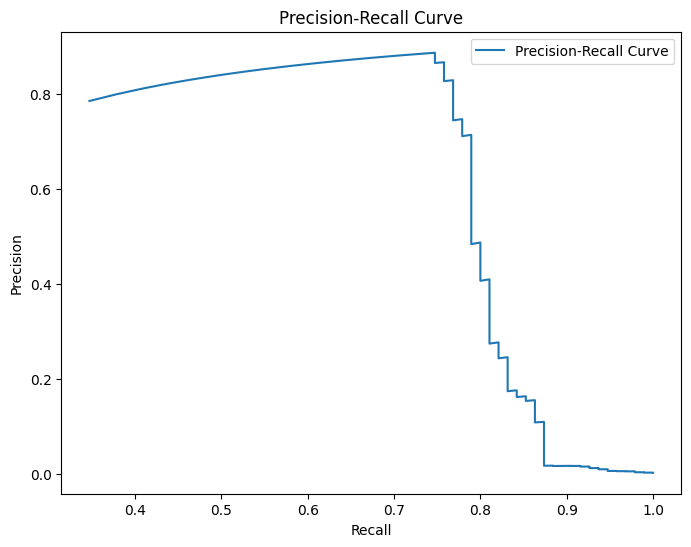

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall3[:-1], precision3[:-1], label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

#### Random Forest

##### Обучение модели

In [ ]:
randov_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

randov_rf_model.fit(X_over, y_over)

RandomForestClassifier(class_weight='balanced', random_state=42)

##### Оценка модели

In [ ]:
y_probs = randov_rf_model.predict_proba(X_test)[:, 1]
precision4, recall4, _ = precision_recall_curve(y_test, y_probs)
auprc_randover_f = auc(recall4, precision4)

In [ ]:
test_pred = randov_rf_model.predict(X_test)
f1_randover_f= f1_score(y_test, test_pred)
prec_randover_f = precision_score(y_test, test_pred)
recall_randover_f = recall_score(y_test, test_pred)

In [ ]:
ndf = [(recall_randover_f, prec_randover_f, f1_randover_f, auprc_randover_f)]

randover_f_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'AUPRC'])
randover_f_score.insert(0, 'Model', 'Random Oversampling Random Forest')
randover_f_score.round(3)

,Model,Recall,Precision,F1 Score,AUPRC
0,Random Oversampling Random Forest,0.726,0.972,0.831,0.822


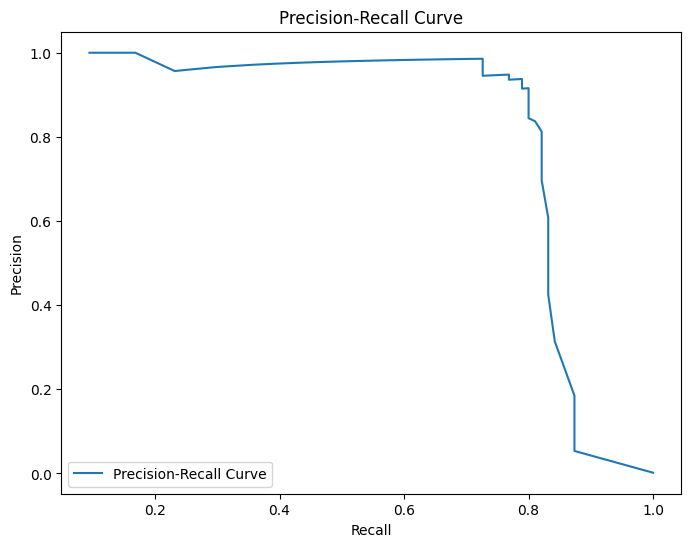

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall4[:-1], precision4[:-1], label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

### SMOTE
(Synthetic Minority Oversampling Technique).

#### Балансировка данных

In [ ]:
smt= SMOTE(random_state=42)
X_smote, y_smote = smt.fit_resample(X_train, y_train)


In [ ]:
print('Genuine:', y_smote.value_counts()[0], '/', round(y_smote.value_counts()[0]/len(y_smote) * 100,2), '% of the dataset')
print('Frauds:', y_smote.value_counts()[1], '/',round(y_smote.value_counts()[1]/len(y_smote) * 100,2), '% of the dataset')

Genuine: 226602 / 50.0 % of the dataset
Frauds: 226602 / 50.0 % of the dataset


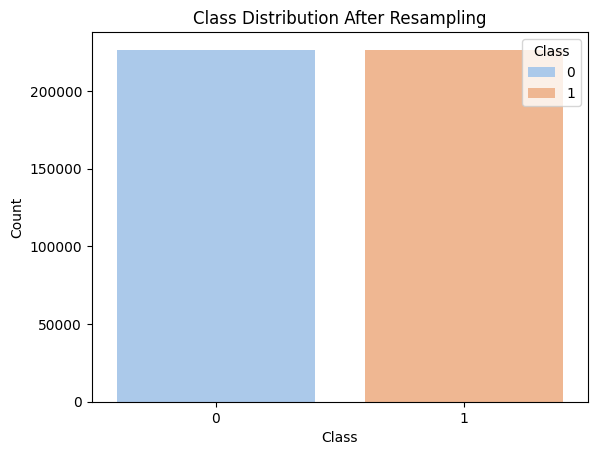

In [ ]:
sns.countplot(x=y_smote, palette='pastel', hue=y_smote)
plt.title("Class Distribution After Resampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#### Logistic Regression

##### Обучение модели

In [ ]:
smote_log = LogisticRegression(random_state=42, max_iter=1000)
smote_log.fit(X_smote, y_smote)

LogisticRegression(max_iter=1000, random_state=42)

##### Оценка модели

In [ ]:
y_probs = smote_log.predict_proba(X_test)[:, 1]
precision5, recall5, _ = precision_recall_curve(y_test, y_probs)
auprc_smote_log = auc(recall5, precision5)

In [ ]:
test_pred = smote_log.predict(X_test)
f1_smote_log = f1_score(y_test, test_pred)
prec_smote_log = precision_score(y_test, test_pred)
recall_smote_log = recall_score(y_test, test_pred)

In [ ]:
ndf = [(recall_smote_log, prec_smote_log, f1_smote_log, auprc_smote_log)]

smote_log_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'AUPRC'])
smote_log_score.insert(0, 'Model', 'SMOTE Logistic Regression')
smote_log_score.round(3)

,Model,Recall,Precision,F1 Score,AUPRC
0,SMOTE Logistic Regression,0.874,0.054,0.101,0.711


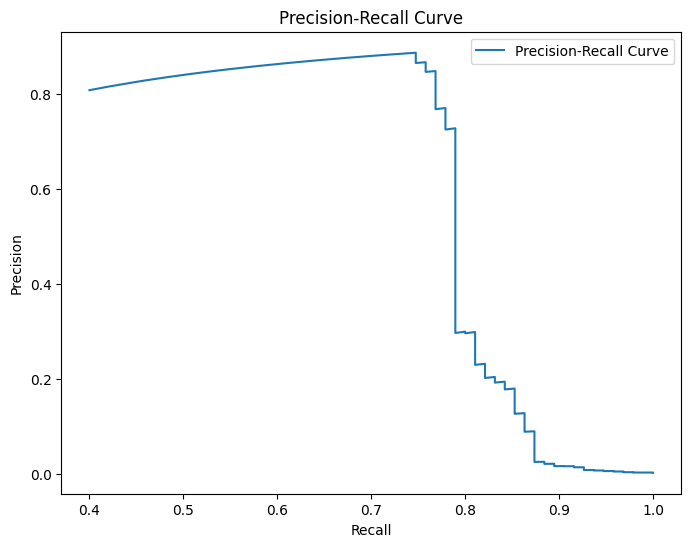

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall5[:-1], precision5[:-1], label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

#### Random Forest

##### Обучение модели

In [ ]:
smote_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

smote_rf_model.fit(X_smote, y_smote)

RandomForestClassifier(class_weight='balanced', random_state=42)

##### Оценка модели

In [ ]:
y_probs = smote_rf_model.predict_proba(X_test)[:, 1]
precision6, recall6, _ = precision_recall_curve(y_test, y_probs)
auprc_smote_f = auc(recall6, precision6)

In [ ]:
test_pred = smote_rf_model.predict(X_test)
f1_smote_f = f1_score(y_test, test_pred)
prec_smote_f = precision_score(y_test, test_pred)
recall_smote_f = recall_score(y_test, test_pred)

In [ ]:
ndf = [(recall_smote_f, prec_smote_f, f1_smote_f, auprc_smote_f)]

smote_f_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'AUPRC'])
smote_f_score.insert(0, 'Model', 'SMOTE Random Forest')
smote_f_score.round(3)

,Model,Recall,Precision,F1 Score,AUPRC
0,SMOTE Random Forest,0.768,0.912,0.834,0.811


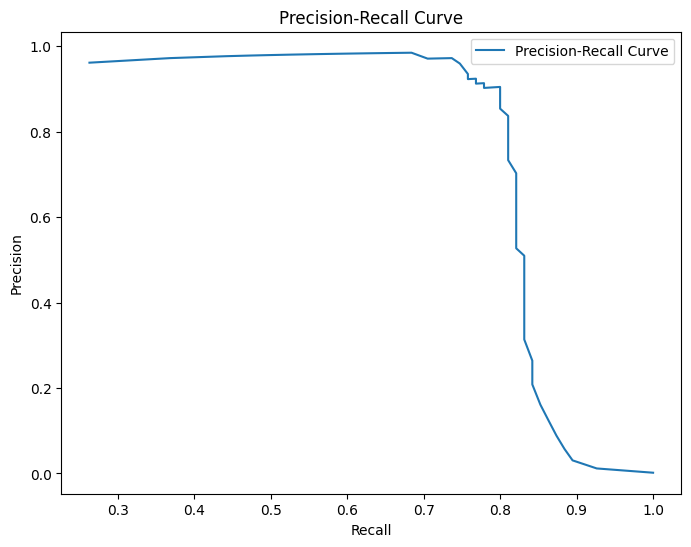

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall6[:-1], precision6[:-1], label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

### Random Undersampling


#### Балансировка данных

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train, y_train)

In [ ]:
print('Genuine:', y_under.value_counts()[0], '/', round(y_under.value_counts()[0]/len(y_under) * 100,2), '% of the dataset')
print('Frauds:', y_under.value_counts()[1], '/',round(y_under.value_counts()[1]/len(y_under) * 100,2), '% of the dataset')

Genuine: 378 / 50.0 % of the dataset
Frauds: 378 / 50.0 % of the dataset


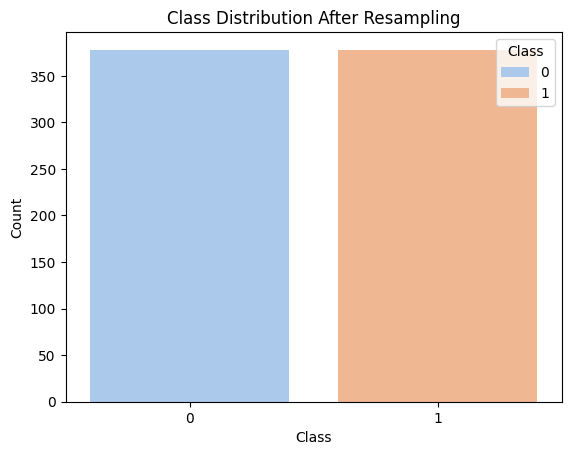

In [ ]:
sns.countplot(x=y_under, palette='pastel', hue=y_under)
plt.title("Class Distribution After Resampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#### Logistic Regression

##### Обучение модели

In [ ]:
randunder_log = LogisticRegression(max_iter=1000, random_state=42)
randunder_log.fit(X_under, y_under)

LogisticRegression(max_iter=1000)

##### Оценка модели

In [ ]:
y_probs = randunder_log.predict_proba(X_test)[:, 1]
precision7, recall7, _ = precision_recall_curve(y_test, y_probs)
auprc_randunder_log = auc(recall7, precision7)

In [ ]:
test_pred = randunder_log.predict(X_test)
f1_randunder_log = f1_score(y_test, test_pred)
prec_randunder_log = precision_score(y_test, test_pred)
recall_randunder_log = recall_score(y_test, test_pred)

In [ ]:
ndf = [(recall_randunder_log, prec_randunder_log, f1_randunder_log, auprc_randunder_log)]

randunder_log_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'AUPRC'])
randunder_log_score.insert(0, 'Model', 'Random Undersampling Logistic Regression')
randunder_log_score.round(3)

,Model,Recall,Precision,F1 Score,AUPRC
0,Random Undersampling Logistic Regression,0.874,0.05,0.095,0.622


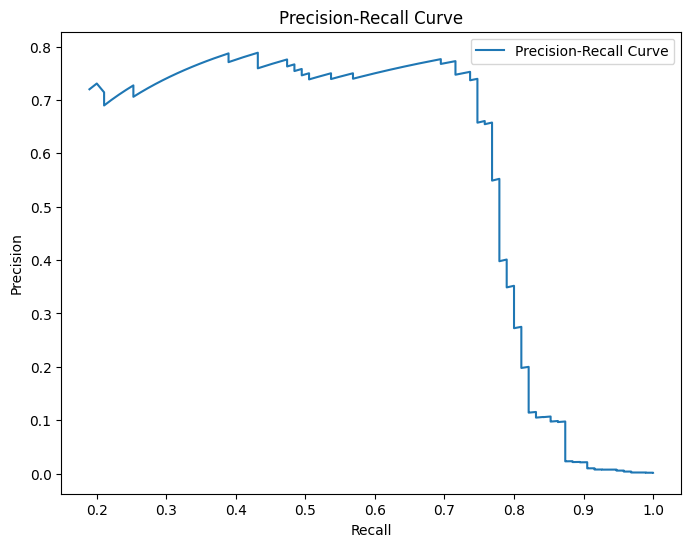

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall7[:-1], precision7[:-1], label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

#### Random Forest

##### Обучение модели

In [ ]:
randunder_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

randunder_rf.fit(X_under, y_under)

RandomForestClassifier(class_weight='balanced', random_state=42)

##### Оценка модели

In [ ]:
y_probs = randunder_rf.predict_proba(X_test)[:, 1]
precision8, recall8, _ = precision_recall_curve(y_test, y_probs)
auprc_randunder_f = auc(recall8, precision8)

In [ ]:
test_pred = randunder_rf.predict(X_test)
f1_randunder_f = f1_score(y_test, test_pred)
prec_randunder_f = precision_score(y_test, test_pred)
recall_randunder_f = recall_score(y_test, test_pred)

In [ ]:
ndf = [(recall_randunder_f, prec_randunder_f, f1_randunder_f, auprc_randunder_f)]

randunder_f_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'AUPRC'])
randunder_f_score.insert(0, 'Model', 'Random Undersampling Random Forest')
randunder_f_score.round(3)

,Model,Recall,Precision,F1 Score,AUPRC
0,Random Undersampling Random Forest,0.863,0.079,0.145,0.739


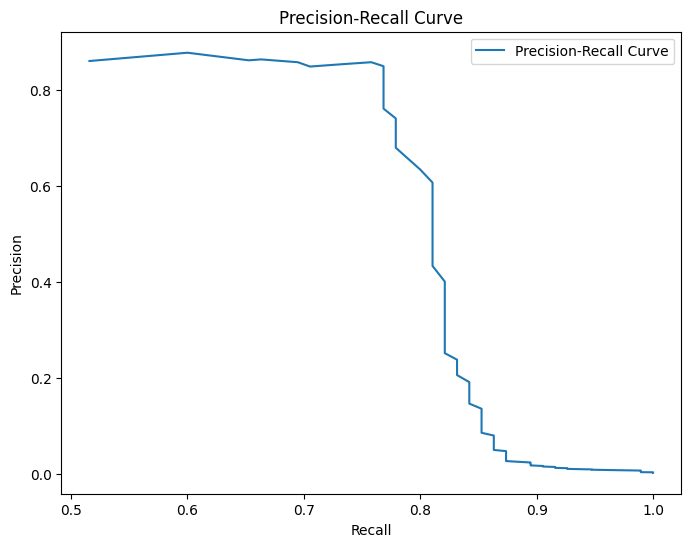

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall8[:-1], precision8[:-1], label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

## Сравнение моделей

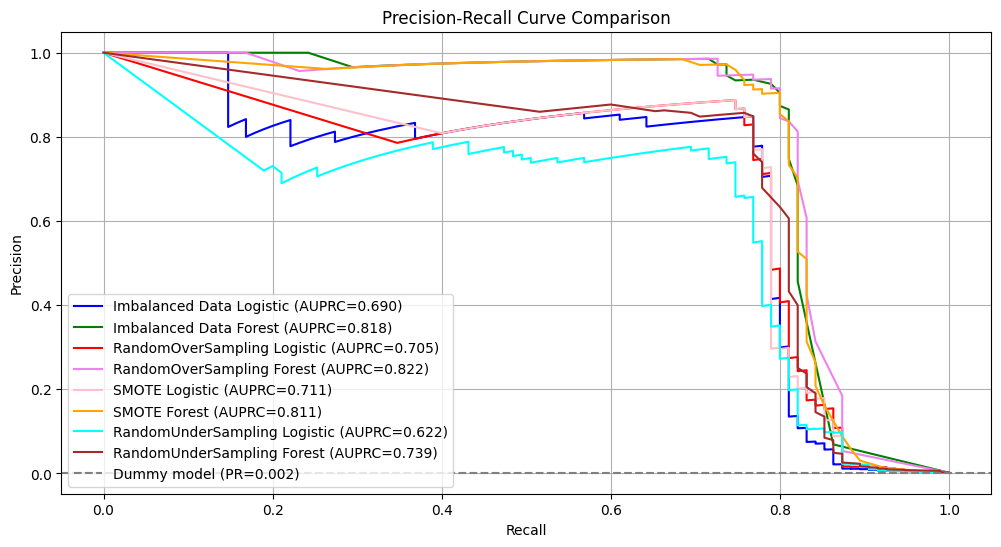

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(recall1, precision1, label=f'Imbalanced Data Logistic (AUPRC={auprc_imbalanced_log:.3f})', color='blue')
plt.plot(recall2, precision2, label=f'Imbalanced Data Forest (AUPRC={auprc_imbalanced_f:.3f})', color='green')

plt.plot(recall3, precision3, label=f'RandomOverSampling Logistic (AUPRC={auprc_randover_log:.3f})', color='red')
plt.plot(recall4, precision4, label=f'RandomOverSampling Forest (AUPRC={auprc_randover_f:.3f})', color='violet')

plt.plot(recall5, precision5, label=f'SMOTE Logistic (AUPRC={auprc_smote_log:.3f})', color='pink')
plt.plot(recall6, precision6, label=f'SMOTE Forest (AUPRC={auprc_smote_f:.3f})', color='orange')

plt.plot(recall7, precision7, label=f'RandomUnderSampling Logistic (AUPRC={auprc_randunder_log:.3f})', color='cyan')
plt.plot(recall8, precision8, label=f'RandomUnderSampling Forest (AUPRC={auprc_randunder_f:.3f})', color='brown')


# Базовый уровень
baseline = y_test.mean()
plt.axhline(baseline, linestyle='--', color='gray', label=f'Dummy model (PR={baseline:.3f})')

# Настройка графика
plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
scores = [
    dummy_score, imbalanced_log_score, imbalanced_f_score,
    randover_log_score, randover_f_score, smote_log_score,
    smote_f_score, randunder_log_score, randunder_f_score
]

results = pd.concat(scores, ignore_index=True, sort=False)
results = results.sort_values(by=['AUPRC'], ascending=True).reset_index(drop=True).round(3)
results

,Model,Recall,Precision,F1 Score,AUPRC
0,Dummy model,1.000,0.002,0.003,0.501
1,Random Undersampling Logistic Regression,0.874,0.050,0.095,0.622
2,Imbalanced Data Logistic Regression,0.579,0.846,0.688,0.690
3,Random Oversampling Logistic Regression,0.874,0.056,0.106,0.705
4,SMOTE Logistic Regression,0.874,0.054,0.101,0.711
5,Random Undersampling Random Forest,0.863,0.079,0.145,0.739
6,SMOTE Random Forest,0.768,0.912,0.834,0.811
7,Imbalanced Data Random Forest,0.705,0.985,0.822,0.818
8,Random Oversampling Random Forest,0.726,0.972,0.831,0.822


## Вывод

## Сохранение модели/моделей